In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.utils import resample
import pickle 
import seaborn as sns
from scipy import stats
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings('ignore')
df=pd.read_csv('99acres_data.csv')
df

city  monthly_rant  BHKS    Baths  sqft_per_inch  \
0            mumbai         17500     1  2 Baths            470   
1            mumbai         75000     3  3 Baths           1800   
2            mumbai         60000     2  2 Baths            950   
3            mumbai         52000     3  3 Baths           1300   
4            mumbai         30000     1   1 Bath            550   
...             ...           ...   ...      ...            ...   
146523  Trivandraum         10000     2  3 Baths           1200   
146524  Trivandraum         21000     2  2 Baths           1155   
146525  Trivandraum         10000     2  2 Baths            861   
146526  Trivandraum         33000     4  5 Baths           3200   
146527  Trivandraum          8000     4  5 Baths           2178   

              build_up_area Type_of_property location_of_the_property  deposit  
0               Carpet Area      Residential             Kolshet Road    75000  
1       Super built-up Area      Residential          Sector 21 Nerul   400000  
2       Super built-up Area      Residential                   Wadala   200000  
3               Carpet Area      Residential       Hiranandani Estate   300000  
4             Built-up Area      Residential        Kanjurmarg (East)   150000  
...                     ...              ...                      ...      ...  
146523        Built-up Area      Independent                  Anayara    25000  
146524          Carpet Area      Residential            Kazhakkoottam    50000  
146525        Built-up Area      Residential            Vattiyoorkkav    30000  
146526            Plot Area      Independent                   Pattom   150000  
146527            Plot Area      Independent              Kallampally    24000  

[146528 rows x 9 columns]

In [2]:
df.head()

city  monthly_rant  BHKS    Baths  sqft_per_inch        build_up_area  \
0  mumbai         17500     1  2 Baths            470          Carpet Area   
1  mumbai         75000     3  3 Baths           1800  Super built-up Area   
2  mumbai         60000     2  2 Baths            950  Super built-up Area   
3  mumbai         52000     3  3 Baths           1300          Carpet Area   
4  mumbai         30000     1   1 Bath            550        Built-up Area   

  Type_of_property location_of_the_property  deposit  
0      Residential             Kolshet Road    75000  
1      Residential          Sector 21 Nerul   400000  
2      Residential                   Wadala   200000  
3      Residential       Hiranandani Estate   300000  
4      Residential        Kanjurmarg (East)   150000

Numbers of Area Type

Super built-up Area    69918
Carpet Area            36847
Built-up Area          29104
Plot Area              10659
Name: build_up_area, dtype: int64


<Axes: xlabel='build_up_area', ylabel='count'>

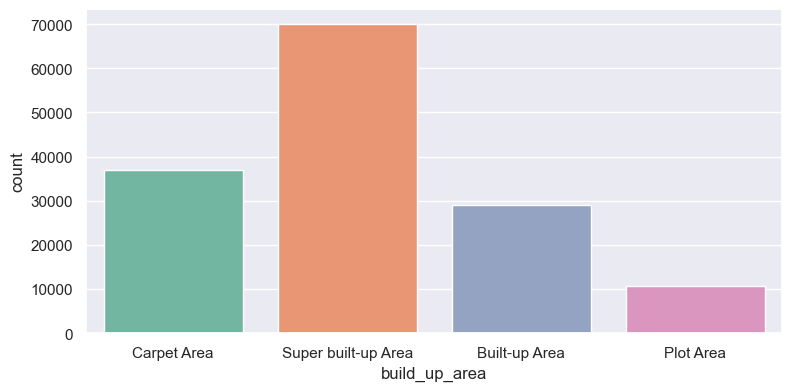

In [3]:
print('Numbers of Area Type')
print()
print(df['build_up_area'].value_counts())
sns.set(rc={'figure.figsize':(8,4)})
sns.countplot(x='build_up_area',data=df,palette='Set2')

Types of Property:

Residential    102024
Independent     41243
Studio           2606
Serviced          363
Farm              161
for               118
Floor              13
Name: Type_of_property, dtype: int64


<Axes: xlabel='Type_of_property', ylabel='count'>

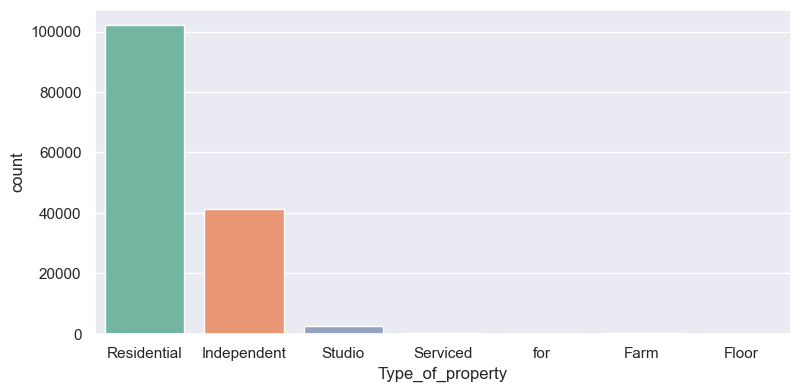

In [4]:
print("Types of Property:")
print()
print(df['Type_of_property'].value_counts())
sns.set(rc={'figure.figsize':(8,4)})
sns.countplot(x='Type_of_property',data=df,palette = 'Set2')

Property Located Based On City:

ncr            42016
mumbai         37566
bangalore      25600
pune           18176
chennai         9973
hyderabad       7131
Ahmedabad       5602
Trivandraum      464
Name: city, dtype: int64


<Axes: xlabel='city', ylabel='count'>

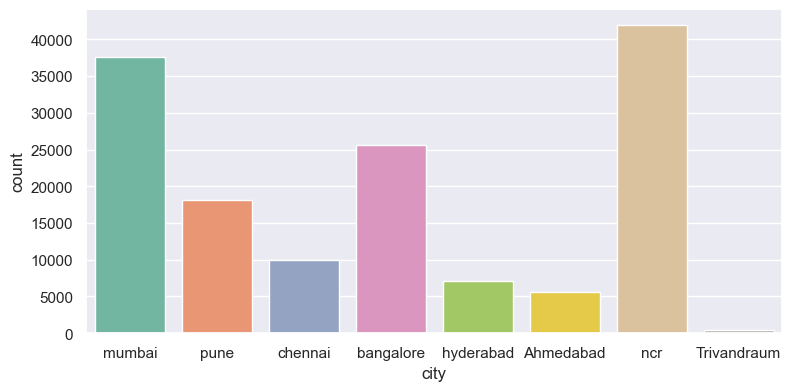

In [5]:
print("Property Located Based On City:")
print()
print(df['city'].value_counts())
sns.set(rc={'figure.figsize':(8,4)})
sns.countplot(x='city',data=df,palette = 'Set2')

<Axes: >

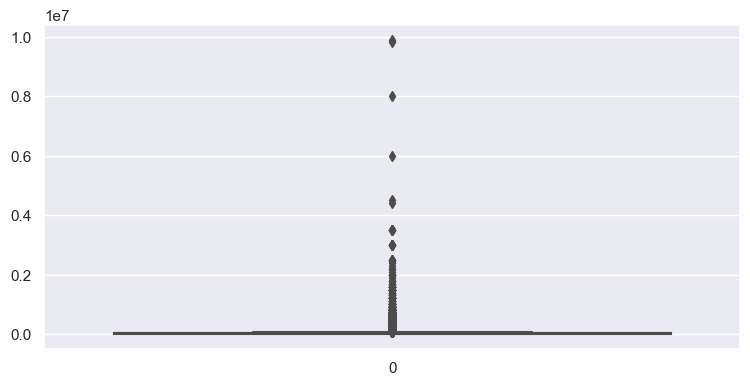

In [6]:
sns.boxplot(df['monthly_rant'])

<Axes: >

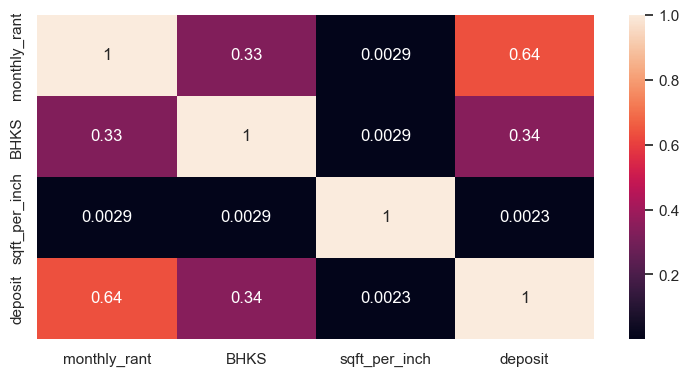

In [7]:
sns.heatmap(df.corr(),annot=True)

In [8]:
df.describe(include='all')

city  monthly_rant           BHKS    Baths  sqft_per_inch  \
count   146528  1.465280e+05  146528.000000   146528   1.465280e+05   
unique       8           NaN            NaN       41            NaN   
top        ncr           NaN            NaN  2 Baths            NaN   
freq     42016           NaN            NaN    68767            NaN   
mean       NaN  3.414242e+04       2.159703      NaN   2.463806e+03   
std        NaN  8.428243e+04       1.107673      NaN   1.816119e+05   
min        NaN  5.000000e+02       1.000000      NaN   1.000000e+00   
25%        NaN  1.300000e+04       1.000000      NaN   6.800000e+02   
50%        NaN  2.000000e+04       2.000000      NaN   1.057000e+03   
75%        NaN  3.290000e+04       3.000000      NaN   1.500000e+03   
max        NaN  9.917000e+06      95.000000      NaN   4.356000e+07   

              build_up_area Type_of_property location_of_the_property  \
count                146528           146528                   146528   
unique                    4                7                    12555   
top     Super built-up Area      Residential          Goregaon (East)   
freq                  69918           102024                      807   
mean                    NaN              NaN                      NaN   
std                     NaN              NaN                      NaN   
min                     NaN              NaN                      NaN   
25%                     NaN              NaN                      NaN   
50%                     NaN              NaN                      NaN   
75%                     NaN              NaN                      NaN   
max                     NaN              NaN                      NaN   

             deposit  
count   1.465280e+05  
unique           NaN  
top              NaN  
freq             NaN  
mean    1.203667e+05  
std     2.937736e+05  
min     0.000000e+00  
25%     3.000000e+04  
50%     6.000000e+04  
75%     1.250000e+05  
max     2.100000e+07

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 146528 entries, 0 to 146527
Data columns (total 9 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   city                      146528 non-null  object
 1   monthly_rant              146528 non-null  int64 
 2   BHKS                      146528 non-null  int64 
 3   Baths                     146528 non-null  object
 4   sqft_per_inch             146528 non-null  int64 
 5   build_up_area             146528 non-null  object
 6   Type_of_property          146528 non-null  object
 7   location_of_the_property  146528 non-null  object
 8   deposit                   146528 non-null  int64 
dtypes: int64(4), object(5)
memory usage: 10.1+ MB


In [10]:
df.shape

(146528, 9)

In [11]:
df.isnull().sum()

city                        0
monthly_rant                0
BHKS                        0
Baths                       0
sqft_per_inch               0
build_up_area               0
Type_of_property            0
location_of_the_property    0
deposit                     0
dtype: int64

In [12]:
df.drop(['Baths','location_of_the_property'],axis=1,inplace=True)

In [13]:
df.Type_of_property.unique()

array(['Residential', 'Independent', 'Studio', 'Serviced', 'for', 'Farm',
       'Floor'], dtype=object)

In [14]:
df=df[df.Type_of_property!='for']
df=df[df.Type_of_property!='Serviced']
df=df[df.Type_of_property!='Floor']

In [15]:
df['monthly_rant']=np.log1p(df['monthly_rant'])

<Axes: xlabel='monthly_rant', ylabel='Density'>

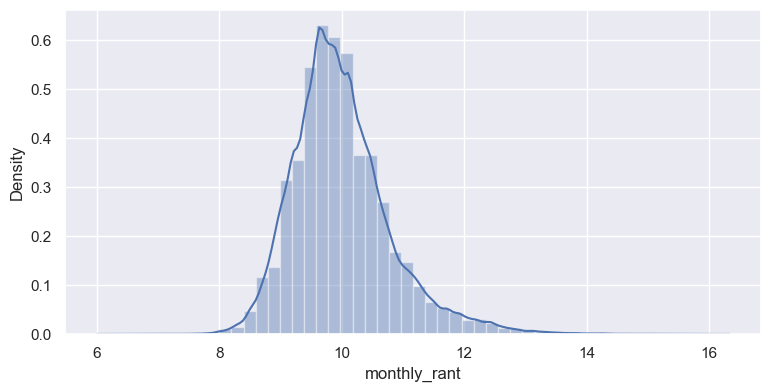

In [16]:
sns.distplot(df['monthly_rant'])

In [17]:
cty = LabelEncoder()
b_u_a = LabelEncoder()
T_o_p = LabelEncoder()
df['city']=cty.fit_transform(df['city'])
df['build_up_area']= b_u_a.fit_transform(df['build_up_area'])
df['Type_of_property'] = T_o_p.fit_transform(df['Type_of_property'])


In [18]:
print("city",df['city'].unique())
print(cty.inverse_transform(list(df['city'].unique())))
print()
print("build_up_area:",df['build_up_area'].unique())
print(b_u_a.inverse_transform(list(df['build_up_area'].unique())))
print()
print("Type_of_property",df['Type_of_property'].unique())
print(T_o_p.inverse_transform(list(df['Type_of_property'].unique())))
print()

city [5 7 3 2 4 0 6 1]
['mumbai' 'pune' 'chennai' 'bangalore' 'hyderabad' 'Ahmedabad' 'ncr'
 'Trivandraum']

build_up_area: [1 3 0 2]
['Carpet Area' 'Super built-up Area' 'Built-up Area' 'Plot Area']

Type_of_property [2 1 3 0]
['Residential' 'Independent' 'Studio' 'Farm']



In [19]:
x = df.drop('Type_of_property',axis=1)
y = df['Type_of_property']
print(x.shape)
print(y.shape)

(146034, 6)
(146034,)


In [20]:
from imblearn.over_sampling import SMOTE


In [21]:
sm = SMOTE()
x_resample,y_resample = sm.fit_resample(x,y)

Text(0.5, 1.0, 'After oversampling')

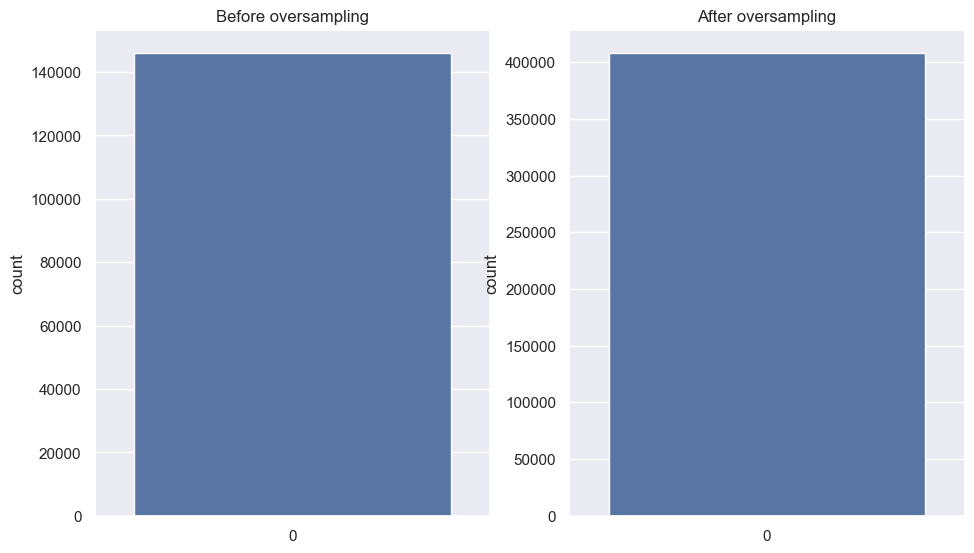

In [22]:
plt.figure(figsize=(10,6))
plt.subplot(121)
sns.countplot(y)
plt.title('Before oversampling')
plt.subplot(122)
sns.countplot(y_resample)
plt.title('After oversampling')

In [23]:
x = df.drop('monthly_rant',axis=1)
y = df.monthly_rant

In [24]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=10)

In [25]:
print('shape of xtrain {}'.format(xtrain.shape))
print('shape of xtest {}'.format(xtest.shape))
print('shape of ytrain {}'.format(ytrain.shape))
print('shape of ytest {}'.format(xtest.shape))

shape of xtrain (116827, 6)
shape of xtest (29207, 6)
shape of ytrain (116827,)
shape of ytest (29207, 6)


In [26]:
st = StandardScaler()
xtrain_scaled = st.fit_transform(xtrain)
xtest_scaled = st.transform(xtest)


In [27]:
def linear_reg(xtrain_scaled,xtest_scaled,ytrain,ytest):
    lr = LinearRegression()
    lr.fit(xtrain_scaled,ytrain)
    ypred=lr.predict(xtest_scaled)
    score=r2_score(ytest,ypred)
    rmse=np.sqrt(mean_squared_error(ytest,ypred))
    print('***Linear Regression Model ***')
    print('Score for Linear Regression Model is {}'.format(score))
    print('RMSE forLinear Regression Model is {}'.format(rmse))

In [28]:
def random_forest_regressor(xtrain_scaled,xtest_scaled,ytrain,ytest):
    rf=RandomForestRegressor()
    rf.fit(xtrain_scaled,ytrain)
    ypred=(rf.predict(xtest_scaled))
    score=r2_score(ytest,ypred)
    rmse=np.sqrt(mean_squared_error(ytest,ypred))
    print('***Random Forest Regressor model ***')
    print('Score for Random Forest Regressor  is {}'.format(score))
    print('RMSE for Random Forest Regressor  is {}'.format(rmse))
    pickle.dump(rf,open('model.pkl','wb'))

In [29]:
def gradient_booting_regressor(xtrain_scaled,xtest_scaled,ytrain,ytest):
    gf = GradientBoostingRegressor()
    gf.fit(xtrain_scaled,ytrain)
    ypred=(gf.predict(xtest_scaled))
    score=r2_score(ytest,ypred)
    rmse=np.sqrt(mean_squared_error(ytest,ypred))
    print('***GradientBoostingRegressor model ***')
    print('Score for Gradient Boosting Regressor  is {}'.format(score))
    print('RMSE for Gradient Boosting Regressor  is {}'.format(rmse))

In [30]:
def model_compare(xtrain_scaled,xtest_scaled,ytrain,ytest):
    linear_reg(xtrain_scaled,xtest_scaled,ytrain,ytest)
    print('-'*100)
    random_forest_regressor(xtrain_scaled,xtest_scaled,ytrain,ytest)
    print('-'*100)
    gradient_booting_regressor(xtrain_scaled,xtest_scaled,ytrain,ytest)
    print('-'*100)
    

In [31]:
model_compare(xtrain_scaled,xtest_scaled,ytrain,ytest)

***Linear Regression Model ***
Score for Linear Regression Model is 0.47784477380544776
RMSE forLinear Regression Model is 0.5741257717584949
----------------------------------------------------------------------------------------------------
***Random Forest Regressor model ***
Score for Random Forest Regressor  is 0.8943004529550479
RMSE for Random Forest Regressor  is 0.25831152938310564
----------------------------------------------------------------------------------------------------
***GradientBoostingRegressor model ***
Score for Gradient Boosting Regressor  is 0.8778539685709209
RMSE for Gradient Boosting Regressor  is 0.2776814754062416
----------------------------------------------------------------------------------------------------
